Using [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013)

Each observation in this dataset is a review of a particular business by a particular user.

* "stars" column: number of stars (1 through 5) assigned by the reviewer to the business. 

* "cool" column: the number of "cool" votes this review received from other Yelp users. 

* The "useful" and "funny" columns are similar to the "cool" column.

Task: classify review into 5 star groups

# Import modules

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

# Import Data

In [83]:
yelp = pd.read_csv('Natural Language Processing Project - yelp.csv')

In [28]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [73]:
np.sum(yelp.isna())

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
text_length    0
dtype: int64

In [74]:
yelp.shape

(10000, 11)

In [30]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [31]:
# Create a text length column
yelp['text_length'] = yelp['text'].apply(len)

# Explore Data and Visualization

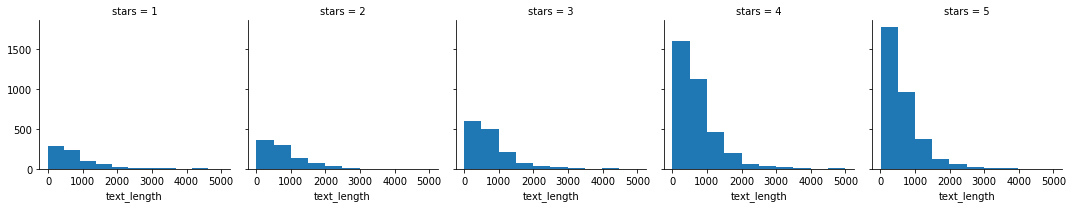

In [32]:
#text length histogram
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_length')

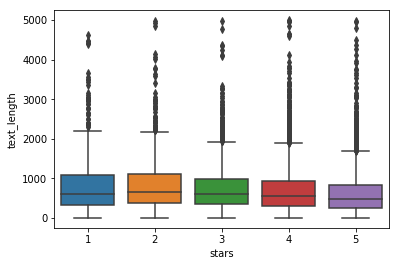

In [34]:
sns.boxplot(x='stars', y='text_length', data=yelp)

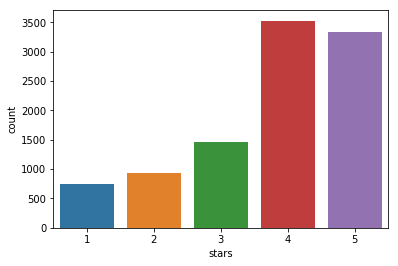

In [37]:
#num of stars from range 1-5
sns.countplot(x='stars', data=yelp)

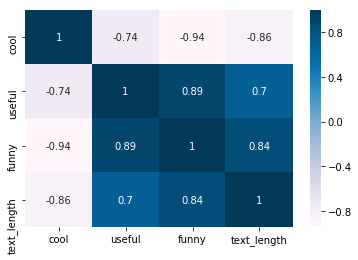

In [48]:
#correlation of features: cool, useful, funny and text_length
stars = yelp.groupby('stars').mean()
sns.heatmap(stars.corr(), cmap='PuBu', annot=True)

# NLP Classification Task

Preprocessing:

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
Convert a collection of text documents to a matrix of token counts

In [139]:
cv = CountVectorizer()

In [143]:
X = yelp['text']
countvector_X = cv.fit_transform(X) #it will return a sparse matrix

In [77]:
#train test split
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(countvector_X, y, test_size=0.3, random_state=42)

traing model: 

Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features 
(e.g., word counts for text classification). The multinomial distribution normally requires 
integer feature counts. However, in practice, fractional counts such as tf-idf may also work

In [82]:
nb = MultinomialNB()

In [87]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
#predications and Evaluations
y_pred = nb.predict(X_test)

In [124]:
confu = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['pred_{}'.format(x) for x in range(1,6)], 
             columns=['true_{}'.format(x) for x in range(1,6)])

#confu['total' = confu.apply(lambda t: reduce(sum(t), [t]))
confu['total'] = confu.apply(lambda t: np.sum(t), axis=1)
confu

,true_1,true_2,true_3,true_4,true_5,total
pred_1,56,23,18,86,35,218
pred_2,19,22,39,158,27,265
pred_3,4,6,43,340,49,442
pred_4,6,5,14,803,259,1087
pred_5,3,2,4,433,546,988


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.26      0.37       218
           2       0.38      0.08      0.14       265
           3       0.36      0.10      0.15       442
           4       0.44      0.74      0.55      1087
           5       0.60      0.55      0.57       988

   micro avg       0.49      0.49      0.49      3000
   macro avg       0.48      0.35      0.36      3000
weighted avg       0.49      0.49      0.45      3000



# Using TfidfTransformer to adding weight to the countvector

Transform a count matrix to a normalized tf or tf-idf representation

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [157]:
#Using pipeline
pipeline = Pipeline(
    [('bow', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('classifier', MultinomialNB())]
)

In [158]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [159]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [160]:
y_pred = pipeline.predict(X_test)

In [161]:
conMat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['pred_{}'.format(x) for x in range(1,6)],
                     columns=['true_{}'.format(x) for x in range(1,6)])
conMat

,true_1,true_2,true_3,true_4,true_5
pred_1,0,0,0,186,32
pred_2,0,0,0,243,22
pred_3,0,0,0,420,22
pred_4,0,0,0,983,104
pred_5,0,0,0,670,318


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       218
           2       0.00      0.00      0.00       265
           3       0.00      0.00      0.00       442
           4       0.39      0.90      0.55      1087
           5       0.64      0.32      0.43       988

   micro avg       0.43      0.43      0.43      3000
   macro avg       0.21      0.25      0.20      3000
weighted avg       0.35      0.43      0.34      3000



c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
